In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
%pip install --upgrade scikit-learn imbalanced-learn
%pip install --upgrade xgboost scikit-learn

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.5/13.5 MB 31.6 MB/s eta 0:00:0000:010:01
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.2.2
    Uninstalling scikit-learn-1.2.2:
      Successfully uninstalled scikit-learn-1.2.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
category-encoders 2.7.0 requires scikit-learn<1.6.0,>=1.0.0, but you have scikit-learn 1.6.1 which is incompatible.
cesium 0.12.4 requires numpy<3.0,>=2.0, but you have numpy 1.26.4 which is incompatible.
Note: you may need to restart the kernel to use updated packages.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 253.9/253.9 MB 6.2 MB/s eta 0:00:000:00:0100:01
  Attempting uninstall: xgboost
    Found existing installation: xgboost 2.0.3
    Uninstalling xgboost-2.0.3:
      Successfully uninstalled xgboost-2.0.3
Note: you may need to restart the kernel t

In [3]:
df = pd.read_csv("/kaggle/input/telco-customer-churn/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
df.drop(columns = ["customerID"], inplace=True)

In [8]:
df.columns

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [9]:
df["gender"].value_counts()

gender
Male      3555
Female    3488
Name: count, dtype: int64

In [10]:
df["SeniorCitizen"].value_counts()

SeniorCitizen
0    5901
1    1142
Name: count, dtype: int64

In [11]:
for col in df.columns:
    if col not in ["tenure", "MonthlyCharges", "TotalCharges"]:
        print(col, df[col].unique())
        print("-------------------------")

gender ['Female' 'Male']
-------------------------
SeniorCitizen [0 1]
-------------------------
Partner ['Yes' 'No']
-------------------------
Dependents ['No' 'Yes']
-------------------------
PhoneService ['No' 'Yes']
-------------------------
MultipleLines ['No phone service' 'No' 'Yes']
-------------------------
InternetService ['DSL' 'Fiber optic' 'No']
-------------------------
OnlineSecurity ['No' 'Yes' 'No internet service']
-------------------------
OnlineBackup ['Yes' 'No' 'No internet service']
-------------------------
DeviceProtection ['No' 'Yes' 'No internet service']
-------------------------
TechSupport ['No' 'Yes' 'No internet service']
-------------------------
StreamingTV ['No' 'Yes' 'No internet service']
-------------------------
StreamingMovies ['No' 'Yes' 'No internet service']
-------------------------
Contract ['Month-to-month' 'One year' 'Two year']
-------------------------
PaperlessBilling ['Yes' 'No']
-------------------------
PaymentMethod ['Electronic che

In [12]:
for col in ["tenure", "MonthlyCharges", "TotalCharges"]:
        print(col, (df[col] == " ").sum())
        print("-----------------")

tenure 0
-----------------
MonthlyCharges 0
-----------------
TotalCharges 11
-----------------


In [13]:
df["TotalCharges"] = df["TotalCharges"].replace(" ", "0.00").astype(float)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [15]:
df["Churn"].value_counts()

Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.00,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.00,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.50,70.35,89.85,118.75
TotalCharges,7043.0,2279.734304,2266.794470,0.00,398.55,1394.55,3786.60,8684.80


In [17]:
#To dicide how to handle zero values in total charges
print(df[df["TotalCharges"] == 0][["tenure", "MonthlyCharges", "TotalCharges"]])

      tenure  MonthlyCharges  TotalCharges
488        0           52.55           0.0
753        0           20.25           0.0
936        0           80.85           0.0
1082       0           25.75           0.0
1340       0           56.05           0.0
3331       0           19.85           0.0
3826       0           25.35           0.0
4380       0           20.00           0.0
5218       0           19.70           0.0
6670       0           73.35           0.0
6754       0           61.90           0.0


In [18]:
def plot_distribution(df, column_name):
    plt.figure(figsize=(12,4))
    plt.subplot(1,2,1)
    sns.histplot(df[column_name], kde = True)
    plt.title(f"Distribution of {column_name}")

    col_mean = df[column_name].mean()
    col_median = df[column_name].median()
    plt.axvline(col_mean, color = "red", linestyle = "--", label= "Mean")
    plt.axvline(col_median, color = "green", linestyle = "--", label= "Median")

    plt.legend()
    
    plt.subplot(1,2,2)
    sns.boxplot(y= df[column_name])
    plt.title(f"Boxplot of {column_name}")
    plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


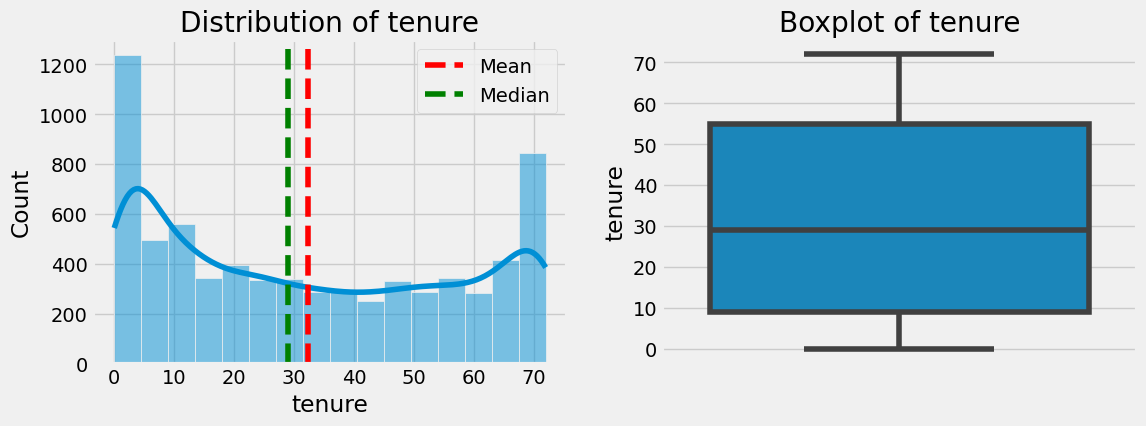

In [19]:
plot_distribution(df, "tenure")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


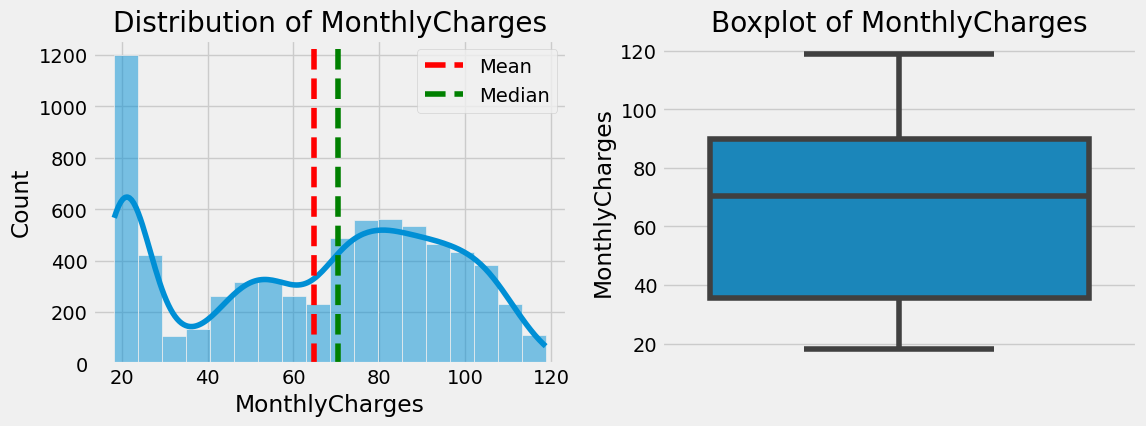

In [20]:
plot_distribution(df, "MonthlyCharges")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


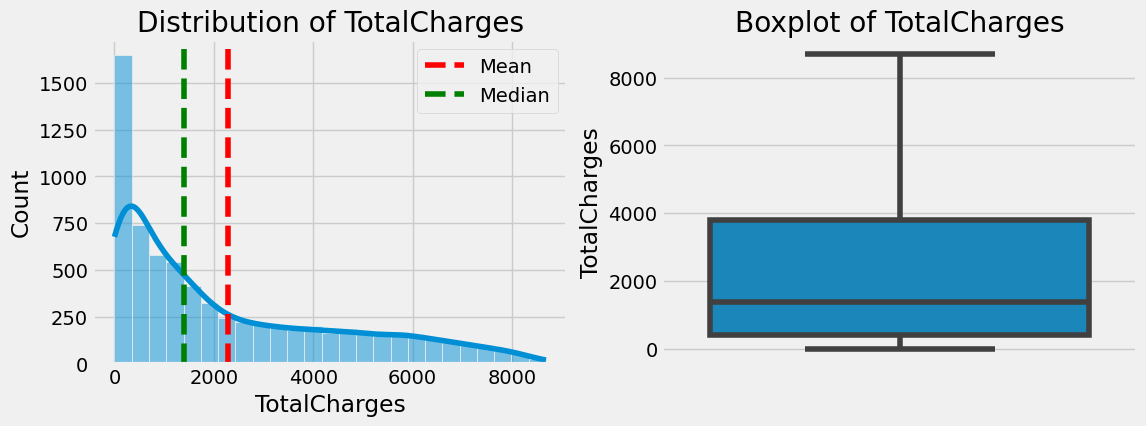

In [21]:
plot_distribution(df, "TotalCharges")

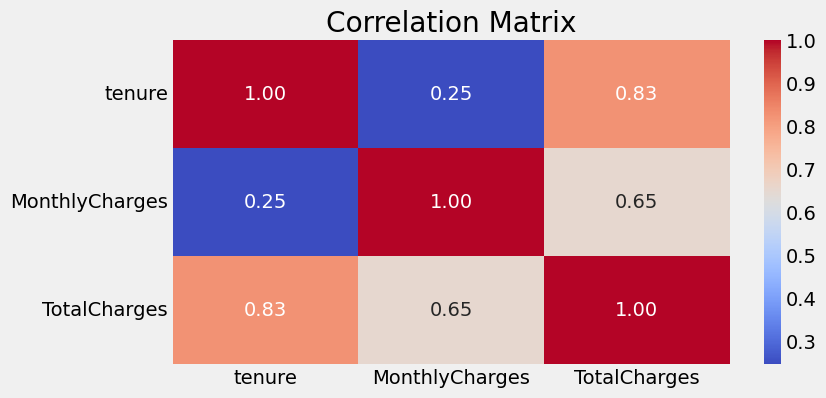

In [22]:
plt.figure(figsize = (8,4))
sns.heatmap(df[["tenure", "MonthlyCharges", "TotalCharges"]].corr(), annot=True, cmap = "coolwarm", fmt= ".2f")
plt.title("Correlation Matrix")
plt.show()

In [23]:
# Apply log1p transformation (log(1 + x)) to avoid issues with zero values
numerical_cols = ['tenure', "MonthlyCharges", "TotalCharges"]
#df[numerical_cols] = df[numerical_cols].apply(lambda x: np.log1p(x))
#Note it down for deployment so you apply the same transformation to new incoming data.

#from sklearn.preprocessing import PowerTransformer

#pt = PowerTransformer(method='yeo-johnson')
#df[numerical_cols] = pt.fit_transform(df[numerical_cols])

In [24]:
#plot_distribution(df, "TotalCharges")

In [25]:
#plot_distribution(df, "MonthlyCharges")

In [26]:
#plot_distribution(df, "tenure")

In [27]:
categorical_cols = df.select_dtypes(include = "object").columns.to_list() + ["SeniorCitizen"]

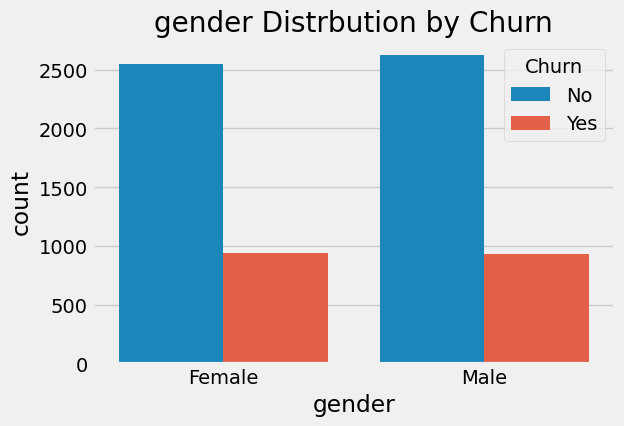

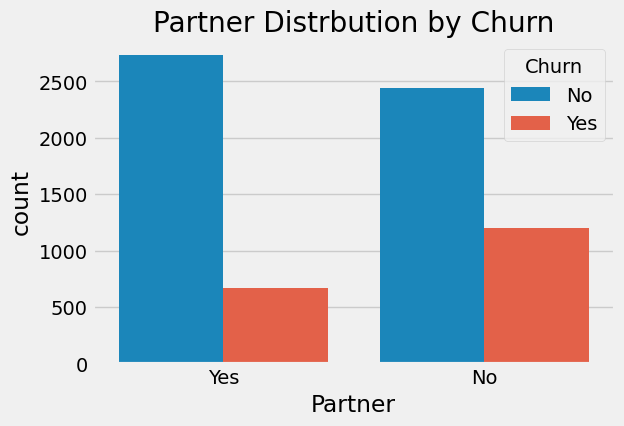

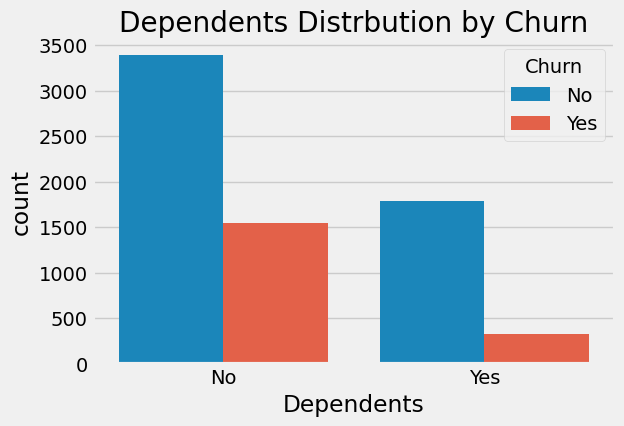

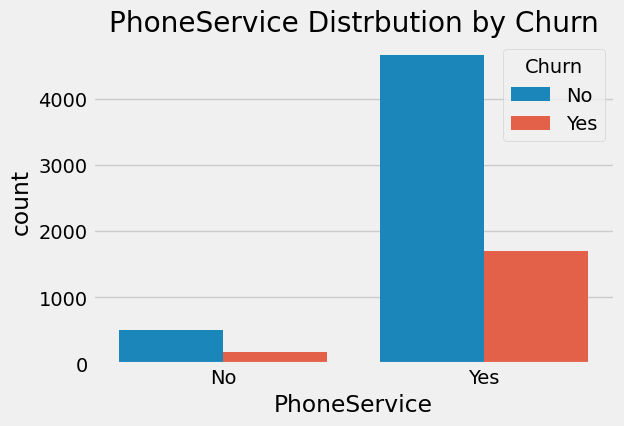

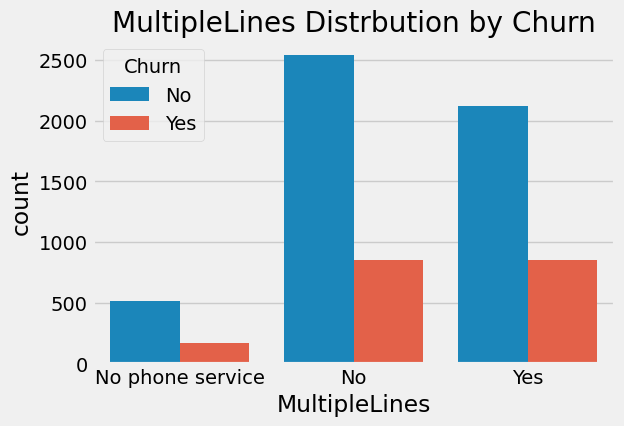

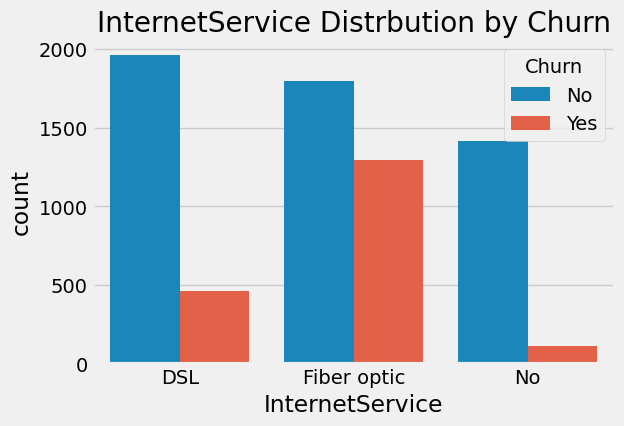

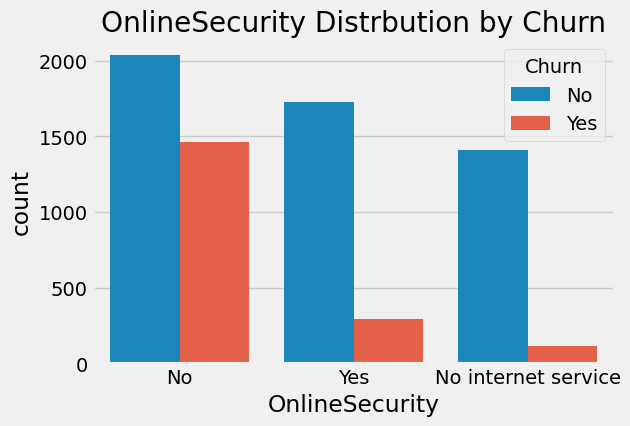

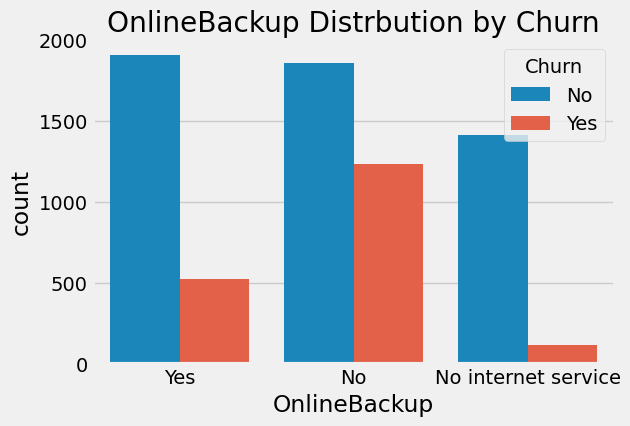

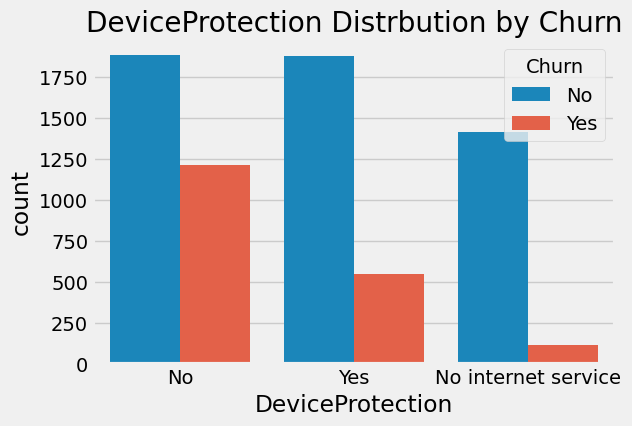

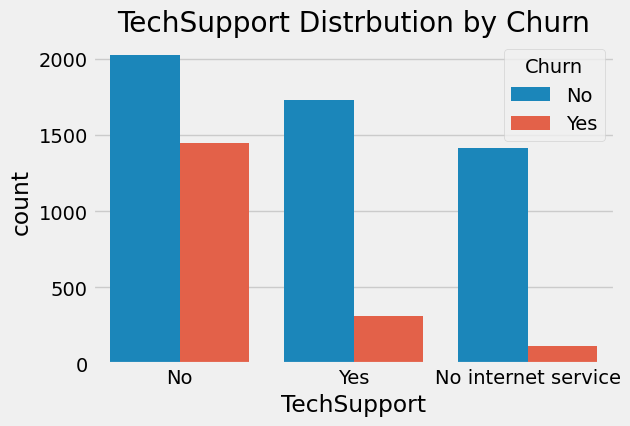

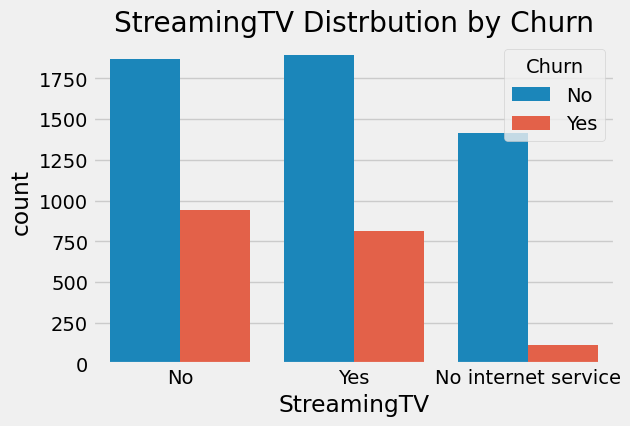

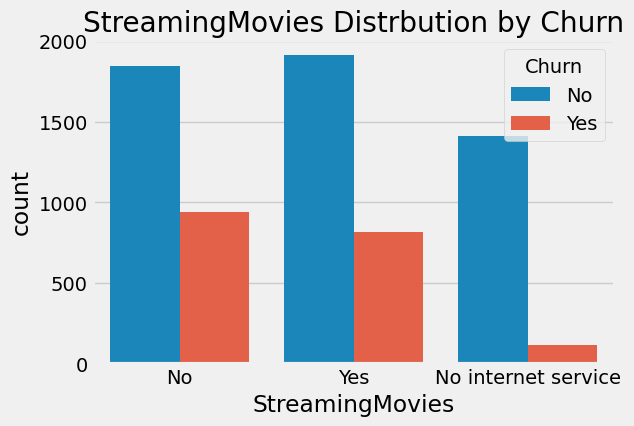

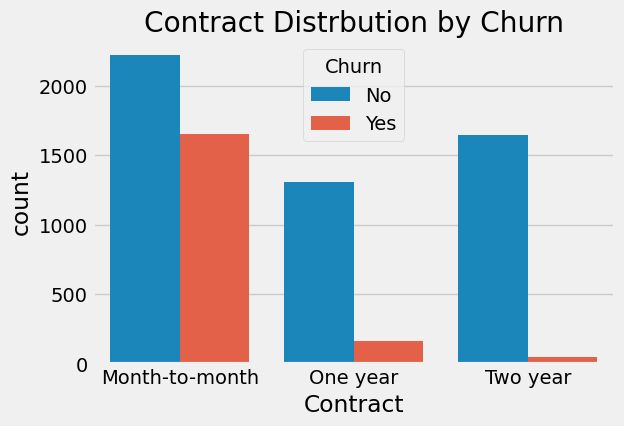

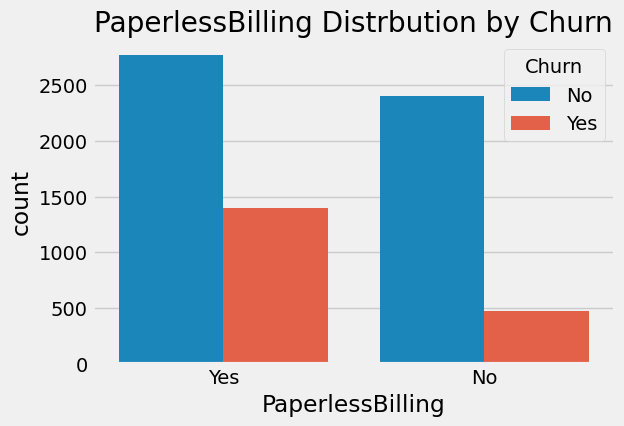

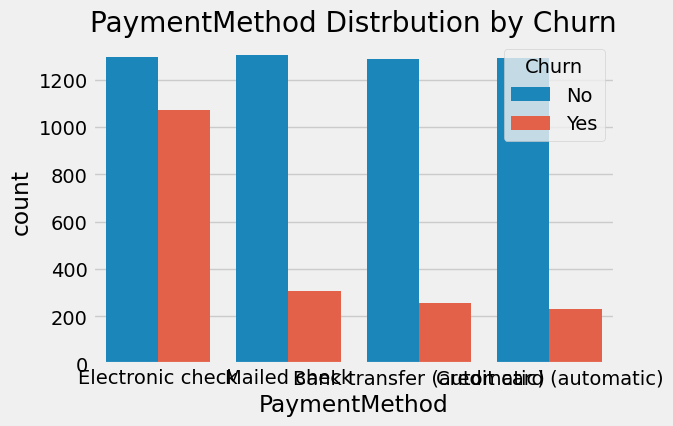

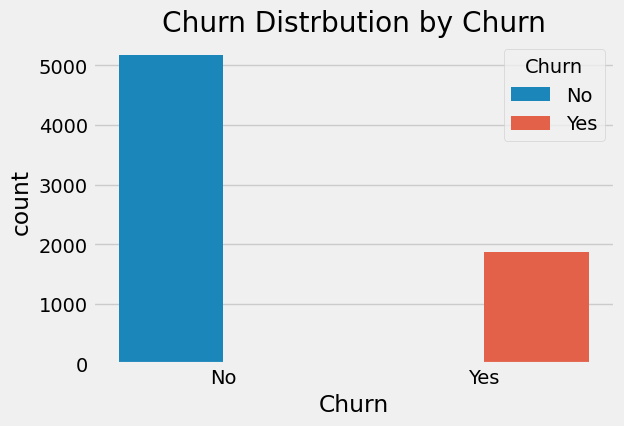

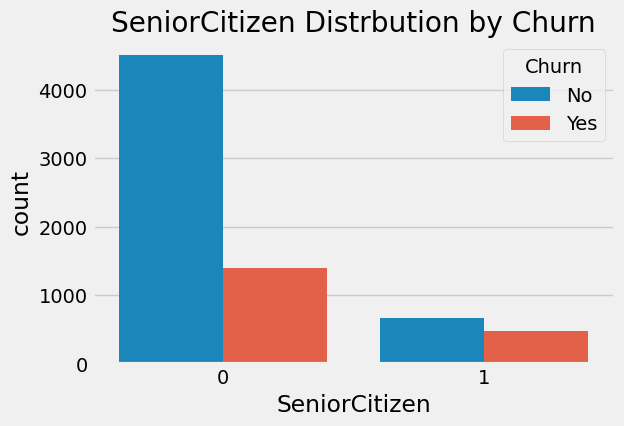

In [28]:
for col in categorical_cols:
    plt.figure(figsize= (6,4))
    sns.countplot(data = df, x = col, hue = "Churn")
    plt.title(f"{col} Distrbution by Churn")
    plt.show()

### Label Encoding

In [29]:
df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})

/tmp/ipykernel_35/2364848822.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Churn"] = df["Churn"].replace({"Yes": 1, "No": 0})


In [30]:
objects_columns = df.select_dtypes(include= "object").columns
objects_columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod'],
      dtype='object')

In [31]:
from sklearn.preprocessing import LabelEncoder

encoders = {}

for col in objects_columns:
    label_encoder = LabelEncoder()
    df[col] = label_encoder.fit_transform(df[col])
    encoders[col] = label_encoder

In [32]:
import pickle
with open("encoder.pkl", "wb") as f:
    pickle.dump(encoders, f)

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


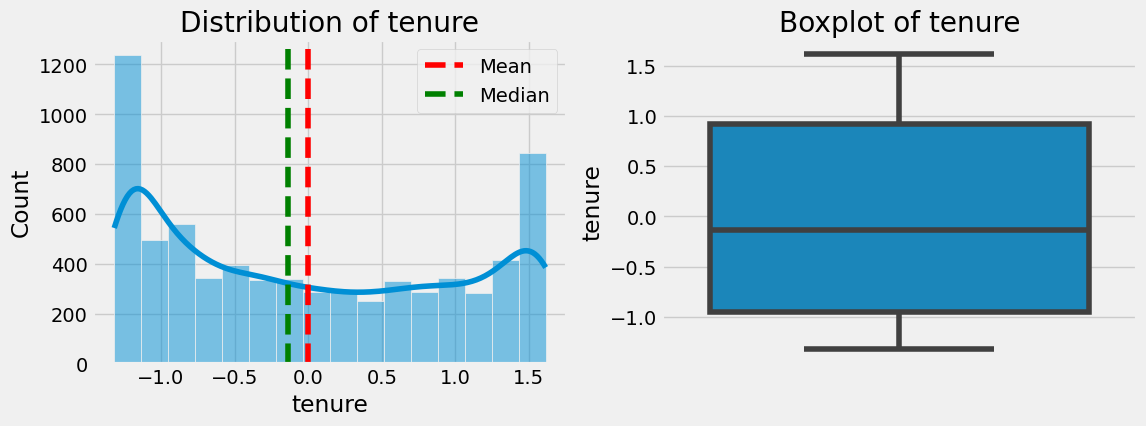

In [35]:
plot_distribution(df, "tenure")

In [36]:
df["Churn"].value_counts()

Churn
0    5174
1    1869
Name: count, dtype: int64

In [37]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, precision_recall_curve

In [38]:
from imblearn.over_sampling import SMOTE

In [39]:
X = df.drop(columns = ["Churn"])
y = df["Churn"]

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [41]:
X_train.shape

(5634, 19)

In [42]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
X_train_smote.shape

(8276, 19)

In [43]:
y_train_smote.value_counts()

Churn
0    4138
1    4138
Name: count, dtype: int64

In [44]:
models = {
    "Random Forest": RandomForestClassifier(random_state= 42),
    "XGBoost": XGBClassifier(random_state= 42)
}

In [45]:
hyperparameters = {
    "Random Forest":{
        "n_estimators": [50, 100, 200],
        "max_depth": [5,10,15, None]
    },
    "XGBoost":{
        "learning_rate": [0.01, 0.05, 0.1, 0.2],
        "max_depth": [3, 5, 7,10]
    }
}

In [46]:
best_models= {}
for model_name, model in models.items():
    print(f"Tunning {model_name}.........")
    grid = GridSearchCV(estimator=model, param_grid=hyperparameters[model_name], cv= 5, scoring= "accuracy", n_jobs=-1, verbose=1)
    grid.fit(X_train_smote, y_train_smote)
    best_models[model_name]= grid.best_estimator_
    print(f"Best Parameters for {model_name} : {grid.best_params_}")
    print(f"Best Accuracy for {model_name} : {grid.best_score_: .2f}\n")

Tunning Random Forest.........
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Random Forest : {'max_depth': None, 'n_estimators': 200}
Best Accuracy for Random Forest :  0.84

Tunning XGBoost.........
Fitting 5 folds for each of 16 candidates, totalling 80 fits
Best Parameters for XGBoost : {'learning_rate': 0.2, 'max_depth': 10}
Best Accuracy for XGBoost :  0.82



In [47]:
#with open("best_model.pkl", "wb") as f:
#    pickle.dump(best_models["Random Forest"], f)

In [48]:
with open("scaler.pkl","wb") as f:
    pickle.dump(scaler, f)

### New Applying Soft Voting Ensemble...

In [49]:
# Get the best trained estimators
rf_best = best_models["Random Forest"]
xgb_best = best_models["XGBoost"]

# Create the VotingClassifier with soft voting
# You can optionally add weights to models, e.g., if one performs better
# For instance, if XGBoost is consistently stronger, give it a higher weight:
# weights=[0.4, 0.6] for RF and XGBoost respectively
ensemble_clf = VotingClassifier(
    estimators=[('rf', rf_best), ('xgb', xgb_best)],
    voting='soft', # Use soft voting (averages probabilities)
    n_jobs=-1      # Use all available CPU cores for fitting/predicting
)

In [50]:
ensemble_clf.fit(X_train_smote, y_train_smote)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(n_estimators=200,
                                                     random_state=42)),
                             ('xgb',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None,
                                            feature_weights=None, gamm...
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=0.2, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=10,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None, ...))],
                 n_jobs=-1, voting='soft')

In [51]:
#y_test_ensemble_pred = ensemble_clf.predict(X_test)

y_test_ensemble_proba = ensemble_clf.predict_proba(X_test)[:, 1]
y_test_ensemble_pred = (y_test_ensemble_proba >= 0.41).astype(int) #tuned threshold

In [52]:
y_test_ensemble_proba

array([0.88823705, 0.30604992, 0.00322392, ..., 0.02143407, 0.01795296,
       0.51868174])

In [53]:
print(f"Accuracy: ", accuracy_score(y_test, y_test_ensemble_pred))
print(f"ROC - AUC Score: ", roc_auc_score(y_test, y_test_ensemble_pred))
print(f"Confusion Matrix: \n", confusion_matrix(y_test, y_test_ensemble_pred))
print(f"Classification Report: \n", classification_report(y_test, y_test_ensemble_pred))

Accuracy:  0.7572746628814763
ROC - AUC Score:  0.7465828045586759
Confusion Matrix: 
 [[797 239]
 [103 270]]
Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.77      0.82      1036
           1       0.53      0.72      0.61       373

    accuracy                           0.76      1409
   macro avg       0.71      0.75      0.72      1409
weighted avg       0.79      0.76      0.77      1409



### New P-R Curve Analysis

In [54]:
precision, recall, thresholds = precision_recall_curve(y_test, y_test_ensemble_proba)

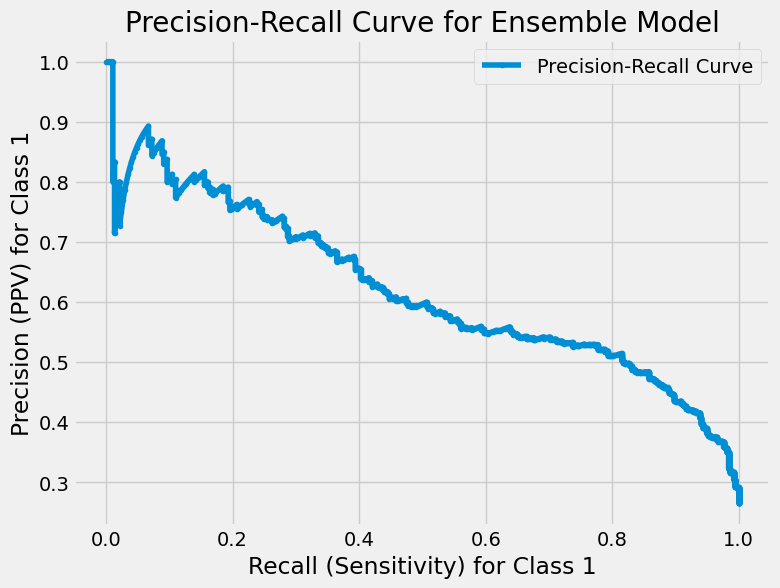

In [55]:
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, marker='.', label='Precision-Recall Curve')
plt.xlabel('Recall (Sensitivity) for Class 1')
plt.ylabel('Precision (PPV) for Class 1')
plt.title('Precision-Recall Curve for Ensemble Model')
plt.grid(True)
plt.legend()
plt.show()

In [56]:
with open("ensemble_model.pkl", "wb") as f:
    pickle.dump(ensemble_clf, f)

Finally

In [57]:
with open("ensemble_model.pkl", "rb") as f:
    loaded_ensemble_model = pickle.load(f)

with open("encoder.pkl", "rb") as f:
   encoders = pickle.load(f)

with open("scaler.pkl", "rb") as f:
    scaler_data = pickle.load(f)

In [58]:
def make_prediction(input_data):
    input_df = pd.DataFrame([input_data])
    for col, encoder in encoders.items():
        if col in input_df.columns: # Check if the column exists in the input data
            input_df[col] = encoder.transform(input_df[[col]])
        else:
            print(f"Warning: Categorical column '{col}' not found in input data. Skipping encoding.")
    numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']
    input_df[numerical_cols] = scaler_data.transform(input_df[numerical_cols])
    probability = loaded_ensemble_model.predict_proba(input_df)[0,1]
    # 5. Apply the prediction threshold (crucial for churn projects)
    predicted_class = 1 if probability >= 0.415 else 0
    return "Churn" if predicted_class == 1 else "No Churn", probability


In [59]:
example_input = {
    'gender': 'Female',
    'SeniorCitizen': 0,
    'Partner': 'Yes',
    'Dependents': 'No',
    'tenure': 1,
    'PhoneService': 'No',
    'MultipleLines': 'No phone service',
    'InternetService': 'DSL',
    'OnlineSecurity': 'No',
    'OnlineBackup': 'Yes',
    'DeviceProtection': 'No',
    'TechSupport': 'No',
    'StreamingTV': 'No',
    'StreamingMovies': 'No',
    'Contract': 'Month-to-month',
    'PaperlessBilling': 'Yes',
    'PaymentMethod': 'Electronic check',
    'MonthlyCharges': 29.85,
    'TotalCharges': 29.85
}

In [60]:
prediction, prob = make_prediction(example_input)

/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, dtype=self.classes_.dtype, warn=True)
/usr/local/lib/python3.11/dist-packages/sklearn/preprocessing/_label.py:129: DataConversionWarning: A column-vector y was

In [61]:
print(f"Prediction: {prediction}, Probability : {prob : .2f}")


Prediction: No Churn, Probability :  0.25


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   float64
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  
